In [65]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns # type: ignore
import matplotlib.pyplot as plt # type: ignore

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score,confusion_matrix,classification_report
import joblib

Attributes:

Dataset information:

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases.
Several constraints were placed on the selection of these instances from a larger database. 
In particular, all patients here are females at least 21 years old of Pima Indian heritage.


Pregnancies: Number of times pregnant

Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test

BloodPressure: Diastolic blood pressure (mm Hg)

SkinThickness: Triceps skin fold thickness (mm)

Insulin: 2-Hour serum insulin (mu U/ml)

BMI: Body mass index (weight in kg/(height in m)^2)

DiabetesPedigreeFunction: Diabetes pedigree function

Age: Age (years)

Outcome: Class variable (0 or 1)



In [26]:
diabetesDF = pd.read_csv('diabetes.csv')
diabetesDF.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [27]:
diabetesDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


========================Before the removal of outliers===================================================


Text(0.5, 1.0, "['Age']")

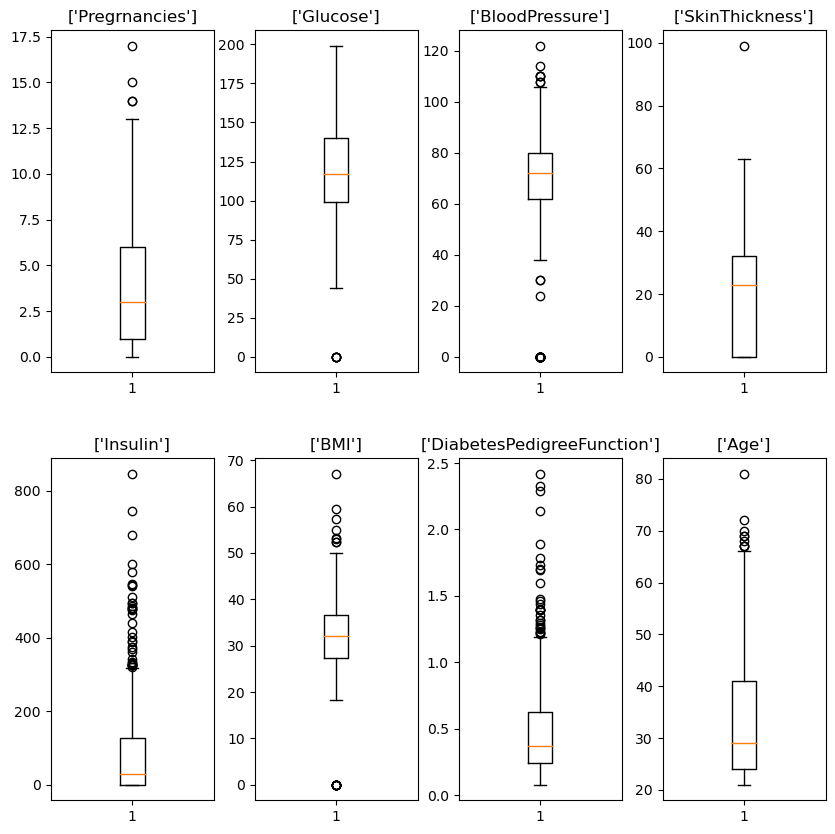

In [28]:
print("========================Before the removal of outliers===================================================")
fig, ax = plt.subplots(2,4, figsize=(10,10))
fig.subplots_adjust(wspace=0.25, hspace=0.25)

ax[0][0].boxplot(diabetesDF['Pregnancies'])
ax[0][0].set_title(['Pregrnancies'])

ax[0][1].boxplot(diabetesDF['Glucose'])
ax[0][1].set_title(['Glucose'])


ax[0][2].boxplot(diabetesDF['BloodPressure'])
ax[0][2].set_title(['BloodPressure'])

ax[0][3].boxplot(diabetesDF['SkinThickness'])
ax[0][3].set_title(['SkinThickness'])

ax[1][0].boxplot(diabetesDF['Insulin'])
ax[1][0].set_title(['Insulin'])

ax[1][1].boxplot(diabetesDF['BMI'])
ax[1][1].set_title(['BMI'])

ax[1][2].boxplot(diabetesDF['DiabetesPedigreeFunction'])
ax[1][2].set_title(['DiabetesPedigreeFunction'])

ax[1][3].boxplot(diabetesDF['Age'])
ax[1][3].set_title(['Age'])

In [29]:
def drop_outliers(df, field_name):
    iqr = 1.5 * (np.percentile(df[field_name], 75) - np.percentile(df[field_name], 25))
    df.drop(df[df[field_name] > (iqr + np.percentile(df[field_name], 75))].index, inplace=True)
    df.drop(df[df[field_name] < (np.percentile(df[field_name], 25) - iqr)].index, inplace=True)
drop_outliers(diabetesDF, 'Pregnancies')
drop_outliers(diabetesDF, 'Glucose')
drop_outliers(diabetesDF, 'BloodPressure')
drop_outliers(diabetesDF, 'SkinThickness')
drop_outliers(diabetesDF, 'Insulin')
drop_outliers(diabetesDF, 'BMI')
drop_outliers(diabetesDF, 'DiabetesPedigreeFunction')
drop_outliers(diabetesDF, 'Age')

========================After the removal of outliers===================================================


Text(0.5, 1.0, "['Age']")

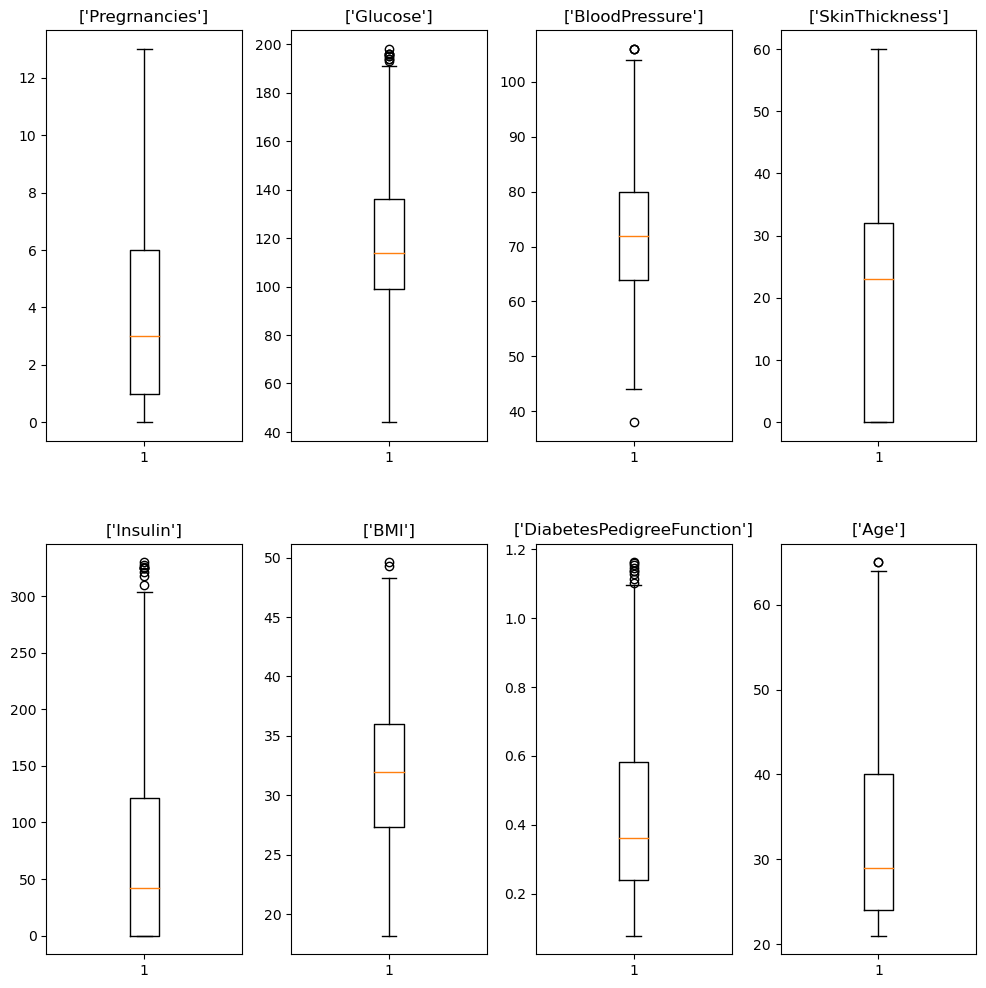

In [30]:
print("========================After the removal of outliers===================================================")
fig, ax = plt.subplots(2,4, figsize=(12,12))
fig.subplots_adjust(wspace=0.25, hspace=0.25)

ax[0][0].boxplot(diabetesDF['Pregnancies'])
ax[0][0].set_title(['Pregrnancies'])

ax[0][1].boxplot(diabetesDF['Glucose'])
ax[0][1].set_title(['Glucose'])


ax[0][2].boxplot(diabetesDF['BloodPressure'])
ax[0][2].set_title(['BloodPressure'])

ax[0][3].boxplot(diabetesDF['SkinThickness'])
ax[0][3].set_title(['SkinThickness'])

ax[1][0].boxplot(diabetesDF['Insulin'])
ax[1][0].set_title(['Insulin'])

ax[1][1].boxplot(diabetesDF['BMI'])
ax[1][1].set_title(['BMI'])

ax[1][2].boxplot(diabetesDF['DiabetesPedigreeFunction'])
ax[1][2].set_title(['DiabetesPedigreeFunction'])

ax[1][3].boxplot(diabetesDF['Age'])
ax[1][3].set_title(['Age'])

In [31]:
corr = diabetesDF.corr()
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.130759,0.206581,-0.088675,-0.090608,0.037389,-0.013274,0.582318,0.235631
Glucose,0.130759,1.000000,0.227750,0.017161,0.280328,0.193989,0.051546,0.268977,0.493355
BloodPressure,0.206581,0.227750,1.000000,0.039799,-0.019897,0.290307,0.022308,0.345872,0.171178
SkinThickness,-0.088675,0.017161,0.039799,1.000000,0.475258,0.383783,0.165758,-0.122427,0.042490
Insulin,-0.090608,0.280328,-0.019897,0.475258,1.000000,0.177380,0.225171,-0.053711,0.114653
BMI,0.037389,0.193989,0.290307,0.383783,0.177380,1.000000,0.148256,0.066110,0.268268
DiabetesPedigreeFunction,-0.013274,0.051546,0.022308,0.165758,0.225171,0.148256,1.000000,0.031168,0.168112
Age,0.582318,0.268977,0.345872,-0.122427,-0.053711,0.066110,0.031168,1.000000,0.267017
Outcome,0.235631,0.493355,0.171178,0.042490,0.114653,0.268268,0.168112,0.267017,1.000000


<Axes: >

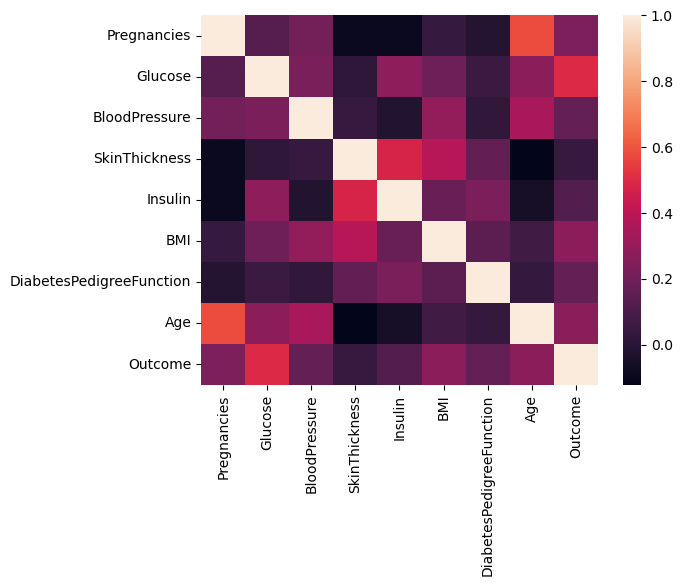

In [32]:
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [33]:
# Segmenting the data into features and target
y = diabetesDF["Outcome"]
X = diabetesDF.drop("Outcome", axis=1)

In [34]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [35]:
# Creating a Model
log = LogisticRegression()

In [36]:
# Traing the model
log.fit(X_train, y_train)

LogisticRegression()

In [37]:
y_pred=log.predict(X_test) ## Predict

In [38]:
# Model Evaluation
accuracy_training_set = accuracy_score(y_test, y_pred)
f1_score_set = f1_score(y_test,y_pred)
precision_score_set = precision_score(y_test,y_pred)
recall_score_set = recall_score(y_test,y_pred)

In [56]:
# Evaluate the model
print('Accuracy on Training Data: ',accuracy_training_set* 100,"%")
print('F1 Score:', f1_score_set* 100,"%")
print('Precision Score:', precision_score_set* 100,"%")
print('Recall Score:', recall_score_set* 100,"%")

Accuracy on Training Data:  75.47169811320755 %
F1 Score: 46.57534246575342 %
Precision Score: 60.71428571428571 %
Recall Score: 37.77777777777778 %


In [40]:
svc=SVC()

In [41]:
# Traing the model
svc.fit(X_train, y_train)

SVC()

In [42]:
y_pred=svc.predict(X_test) ## Predict

In [43]:
# Model Evaluation
accuracy_training_set = accuracy_score(y_test, y_pred)
f1_score_set = f1_score(y_test,y_pred)
precision_score_set = precision_score(y_test,y_pred)
recall_score_set = recall_score(y_test,y_pred)

In [44]:
# Evaluate the model
print('Accuracy on Training Data: ',accuracy_training_set* 100,"%")
print('F1 Score:', f1_score_set* 100,"%")
print('Precision Score:', precision_score_set* 100,"%")
print('Recall Score:', recall_score_set* 100,"%")

Accuracy on Training Data:  75.47169811320755 %
F1 Score: 46.57534246575342 %
Precision Score: 60.71428571428571 %
Recall Score: 37.77777777777778 %


In [45]:
rf = RandomForestClassifier(random_state=0)

In [47]:
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=0)

In [49]:
y_pred=rf.predict(X_test)

In [52]:
cm=confusion_matrix(y_test,y_pred)

In [57]:
cm

array([[100,  14],
       [ 21,  24]], dtype=int64)

In [66]:
cr=classification_report(y_test,y_pred)

In [63]:
print(cr)
print(cm)

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       114
           1       0.63      0.53      0.58        45

    accuracy                           0.78       159
   macro avg       0.73      0.71      0.71       159
weighted avg       0.77      0.78      0.77       159

[[100  14]
 [ 21  24]]


In [67]:
#model saving and loading
joblib.dump(rf, 'diabetes_model_new.pkl')
#diabetesLoadedModel = joblib.load('diabeteseModel.pkl')

['diabetes_model_new.pkl']